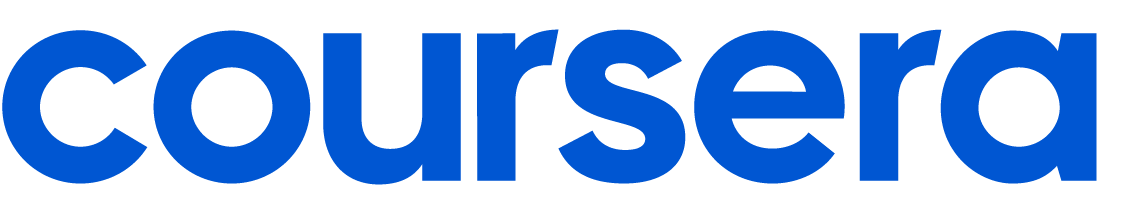

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# Import any other packages you may want to use
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model, metrics

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [67]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [68]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [69]:
print('Summary statistics of train dataset')
train_df.describe()

Summary statistics of train dataset


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [70]:
#Handling Missing Values:

print('Missing values of train dataset')
train_df.isnull().sum()

Missing values of train dataset


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [71]:
print('Summary statistics of train dataset')
test_df.describe()

Summary statistics of train dataset


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000
mean,43.536483,82487.391036,127486.538667,574.665948,59.576315,2.501037,13.496206,36.086298,0.500263
std,15.015927,38966.033421,70703.100952,158.800306,34.548087,1.118149,6.647329,16.928304,0.231246
min,18.000000,15003.000000,5002.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,31.000000,48745.000000,66173.500000,437.000000,30.000000,2.000000,7.750000,24.000000,0.300000
50%,44.000000,82545.000000,127345.000000,575.000000,60.000000,3.000000,13.500000,36.000000,0.500000
75%,57.000000,116184.000000,188674.000000,712.000000,89.000000,4.000000,19.270000,48.000000,0.700000
max,69.000000,149999.000000,249995.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


In [72]:
#Handling Missing Values:

print('Missing values of train dataset')
test_df.isnull().sum()

Missing values of train dataset


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64

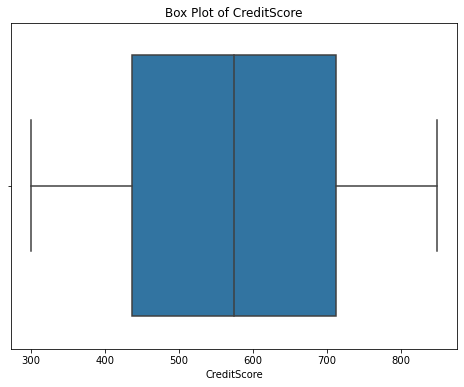

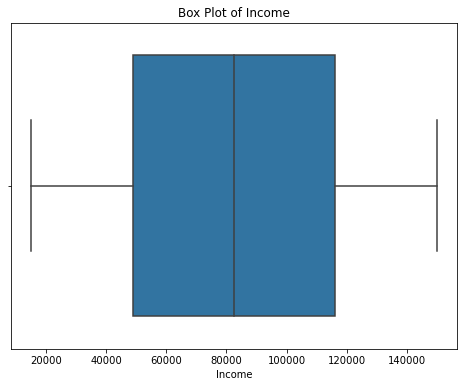

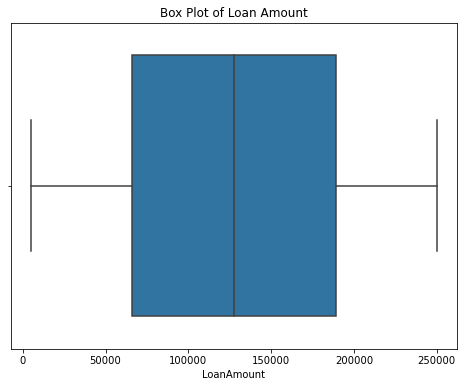

In [73]:
#Checking for Outliers

plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['CreditScore'])
plt.xlabel('CreditScore')
plt.title('Box Plot of CreditScore')
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['Income'])
plt.xlabel('Income')
plt.title('Box Plot of Income')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['LoanAmount'])
plt.xlabel('LoanAmount')
plt.title('Box Plot of Loan Amount')
plt.show()

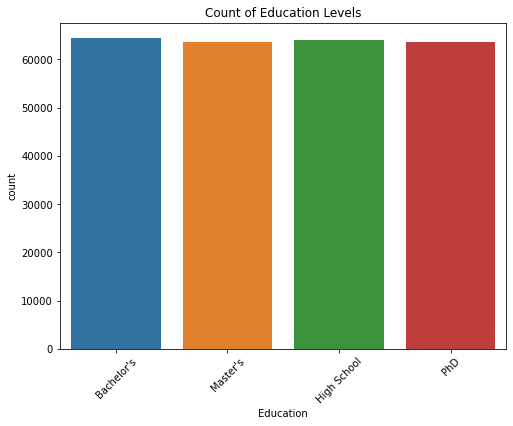

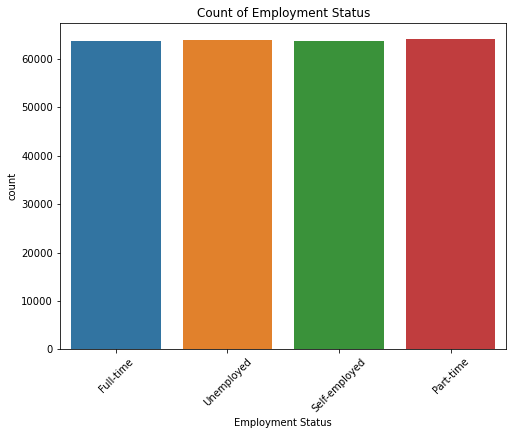

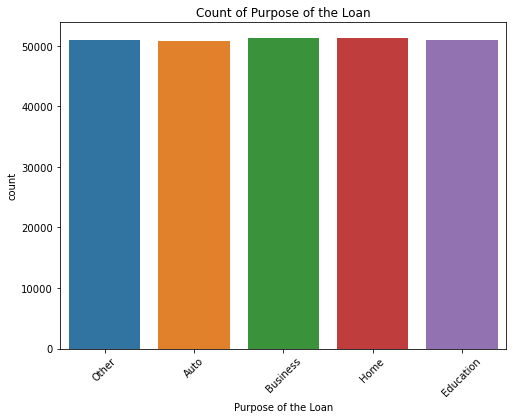

In [74]:
#Distribution of Categorical Variables

plt.figure(figsize=(8, 6))
sns.countplot(x=train_df['Education'])
plt.xlabel('Education')
plt.title('Count of Education Levels')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x=train_df['EmploymentType'])
plt.xlabel('Employment Status')
plt.title('Count of Employment Status')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x=train_df['LoanPurpose'])
plt.xlabel('Purpose of the Loan')
plt.title('Count of Purpose of the Loan')
plt.xticks(rotation=45)
plt.show()

In [75]:
# Select the categorical columns in the DataFrame
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Loop through each categorical column and apply value_counts
for col in categorical_cols:
    print(f"Value counts for column '{col}':")
    print(train_df[col].value_counts())
    print("\n")

Value counts for column 'LoanID':
HL0G6EB1Q5    1
QE15I2GORM    1
CUMFV4EBQC    1
6FVRFT8W2F    1
7OGB43MYCL    1
             ..
G9M8RRP73P    1
ZB1VRXT9G5    1
TL4VHL63PE    1
3LA4F2ZE6P    1
Y9NOBYYN4V    1
Name: LoanID, Length: 255347, dtype: int64


Value counts for column 'Education':
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: Education, dtype: int64


Value counts for column 'EmploymentType':
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: EmploymentType, dtype: int64


Value counts for column 'MaritalStatus':
Married     85302
Divorced    85033
Single      85012
Name: MaritalStatus, dtype: int64


Value counts for column 'HasMortgage':
Yes    127677
No     127670
Name: HasMortgage, dtype: int64


Value counts for column 'HasDependents':
Yes    127742
No     127605
Name: HasDependents, dtype: int64


Value counts for column 'LoanPurpose':
Business     51298
Home         51286
Educati

                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.001244   -0.002213    -0.000548       -0.000341   
Income         -0.001244  1.000000   -0.000865    -0.001430        0.002675   
LoanAmount     -0.002213 -0.000865    1.000000     0.001261        0.002817   
CreditScore    -0.000548 -0.001430    0.001261     1.000000        0.000613   
MonthsEmployed -0.000341  0.002675    0.002817     0.000613        1.000000   
NumCreditLines -0.000890 -0.002016    0.000794     0.000016        0.001267   
InterestRate   -0.001127 -0.002303   -0.002291     0.000436        0.000096   
LoanTerm        0.000263 -0.000998    0.002538     0.001130       -0.001166   
DTIRatio       -0.004689  0.000205    0.001122    -0.001039        0.001765   
Default        -0.167783 -0.099119    0.086659    -0.034166       -0.097374   

                NumCreditLines  InterestRate  LoanTerm  DTIRatio   Default  
Age                  -0.000890     -0.001127  0.00026

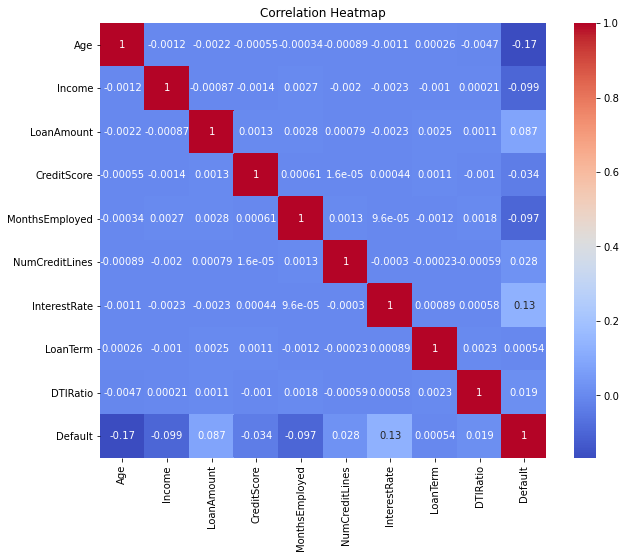

In [76]:
#Corelation matrix
correlation_matrix = train_df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
'''Age and Default: There is a negative correlation of approximately -0.1678 between 'Age' and 'Default'. This suggests that as the age of borrowers increases, the likelihood of default decreases (which makes sense as older individuals might be more financially stable).

Income and Default: There is a negative correlation of approximately -0.0991 between 'Income' and 'Default'. This suggests that higher income is associated with a lower likelihood of default.

LoanAmount and Default: There is a positive correlation of approximately 0.0867 between 'LoanAmount' and 'Default'. This indicates that larger loan amounts are associated with a higher likelihood of default.

CreditScore and Default: There is a negative correlation of approximately -0.0342 between 'CreditScore' and 'Default'. A higher credit score is associated with a lower likelihood of default.

InterestRate and Default: There is a positive correlation of approximately 0.1313 between 'InterestRate' and 'Default'. Higher interest rates are associated with a higher likelihood of default.

MonthsEmployed and Default: There is a negative correlation of approximately -0.0974 between 'MonthsEmployed' and 'Default'. Longer employment periods are associated with a lower likelihood of default.

NumCreditLines, LoanTerm, and DTIRatio: These features have relatively low correlations with 'Default', indicating weak linear relationships.'''

In [77]:
import numpy as np
#Feature engineering
import numpy as np

# Feature Crosses
train_df['Age_Income'] = train_df['Age'] * train_df['Income']

# Binning Numeric Features
bins = [0, 30, 45, 60, 100]
labels = ['Young', 'Middle-Aged', 'Senior', 'Elderly']
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=bins, labels=labels)

# Logarithmic Transformation
train_df['Log_Income'] = np.log(train_df['Income'] + 1)  # Adding 1 to avoid issues with log(0)

# Feature Aggregations
education_mean_income = train_df.groupby('Education')['Income'].mean()
train_df['Education_Mean_Income'] = train_df['Education'].map(education_mean_income)

# Count Encoding
loan_purpose_count = train_df['LoanPurpose'].value_counts().to_dict()
train_df['LoanPurpose_Count'] = train_df['LoanPurpose'].map(loan_purpose_count)

In [78]:
# Feature Crosses
test_df['Age_Income'] = test_df['Age'] * test_df['Income']

# Binning Numeric Features
bins = [0, 30, 45, 60, 100]
labels = ['Young', 'Middle-Aged', 'Senior', 'Elderly']
test_df['Age_Group'] = pd.cut(test_df['Age'], bins=bins, labels=labels)

# Logarithmic Transformation
test_df['Log_Income'] = np.log(test_df['Income'] + 1)  # Adding 1 to avoid issues with log(0)

# Feature Aggregations
education_mean_income = train_df.groupby('Education')['Income'].mean()
test_df['Education_Mean_Income'] = test_df['Education'].map(education_mean_income)

# Count Encoding
loan_purpose_count = train_df['LoanPurpose'].value_counts().to_dict()
test_df['LoanPurpose_Count'] = test_df['LoanPurpose'].map(loan_purpose_count)

In [48]:
X.shape

(255347, 18)

In [49]:
Y.shape

(109435, 17)

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Separate the training dataset into features (X_train) and the target variable (y_train)
X_train = train_df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education_Mean_Income', 'LoanPurpose_Count', 'Age_Income', 'Log_Income']]
y_train = train_df['Default']

# Define the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Separate the test dataset into features (X_test)
X_test = test_df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education_Mean_Income', 'LoanPurpose_Count', 'Age_Income', 'Log_Income']]

# Make predictions on the test set
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Create prediction_df
prediction_df = pd.DataFrame({'LoanID': test_df['LoanID'], 'predicted_probability': predicted_probabilities})

# Ensure the DataFrame has the required number of rows (109,435)
print(prediction_df.shape)

# View the first 10 rows of prediction_df
print(prediction_df.head(10))

# Split the training dataset into training and validation sets for evaluation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

(109435, 2)
       LoanID  predicted_probability
0  7RYZGMKJIR               0.080085
1  JDL5RH07AM               0.014667
2  STAL716Y79               0.045249
3  SO0KKJ3IQB               0.038000
4  T99CWTYDCP               0.079471
5  0SNHFWV4UP               0.128728
6  S6ITP6LGYS               0.083551
7  A6I7U12IRJ               0.140597
8  8W6KY50JU4               0.107569
9  THFQ08OLMU               0.041059
Accuracy: 0.88
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC AUC: 0.69


In [84]:
# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [85]:
# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.083035
1,JDL5RH07AM,0.016618
2,STAL716Y79,0.074913
3,SO0KKJ3IQB,0.058125
4,T99CWTYDCP,0.076521
5,0SNHFWV4UP,0.066146
6,S6ITP6LGYS,0.060588
7,A6I7U12IRJ,0.083270
8,8W6KY50JU4,0.067733
9,THFQ08OLMU,0.097076


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [86]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [87]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [88]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [89]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [90]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!